# SI 618 WN Project Part I

Version 2025.02.06.2.CT

The instructions for this component of the project are available as a 
[Google Doc](https://docs.google.com/document/d/1N2TlYnQuLO3ihIMcr9yKreiSVmqlrOZh7sq6zVcqEnk/edit?tab=t.0#heading=h.hi1g9fls4kkt).
You will need to add multiple Code and Markdown cells below.  I have replicated the
section headings as markdown blocks below.  You will need to add more code and 
markdown blocks below.

Remember to save your work often!


## Project Title
> Provide a descriptive working title for your project.


A Comparative and Cross-Brand Analysis of Electric Vehicle Models: Insights for Consumers and Manufacturers

## Team Members
> List each team member and include their uniqname

- Xiao Dong (dongxiao)
- Zezhen Wang (zezhenw)
- Lingxiao Zhong (zhonglx)

## Overview
> Give a high level description of your project


The rising demand for electric vehicles (EVs) has piqued our interest in understanding what makes them so popular. We aim to identify the key features and specifications that set certain models apart. Specifically, we will compare EV models from various brands, focusing on aspects such as battery performance, electric range, sales figures, and more.

To explore these questions, we will start by inspecting the datasets **EV_POP_2024_BAT** and **cars_data_cleaned**, and we may incorporate additional datasets in the future. Our analysis aims to provide valuable insights that benefit both consumers and manufacturers. For consumers, this project will help identify the EV that best meets their needs. For manufacturers, it will offer insights into how their vehicles compare with competitors, highlighting areas for potential improvement.

## Motivation 
> Explain why you chose this particular topic for your project.	Include the three "real-world" questions that you generated about the data, and be sure to explain what you hope to learn by answering them.


Electric vehicles are gaining popularity worldwide, but what makes them appealing? We want to explore which features most influence consumer adoption and how different models compare in performance, sales, and pricing. Understanding these factors will help us uncover trends in the EV market and provide meaningful recommendations for both buyers and manufacturers.

To guide our research, we aim to answer key real-world questions such as:
- Which EV features most influence consumer decisions and sale prices?
- Which EV models are most popular in different regions?
- How does EV specs impact their popularity in WA?

## Data Sources
> List the two (or more) sources of data that you'll be using.  Provide URLs where appropriate.	Explain how the two (or more) datasets complement each other
	


In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("https://data.wa.gov/api/views/rpr4-cgyd/rows.csv?accessType=DOWNLOAD")
# df_new = df[df["New or Used Vehicle"] == 'New']
# df_2024 = df_new[df_new["Model Year"] == 2024]
# df_2024_only_battery = df_2024[df_2024["Clean Alternative Fuel Vehicle Type"] == 'Battery Electric Vehicle (BEV)']
# df_2024_only_battery.to_csv("EV_POP_2024_BAT.csv",index = False)

In [3]:
car_spec = pd.read_csv("cars_data_cleaned.csv", index_col=0)
sale_data = pd.read_csv("EV_POP_2024_BAT.csv")

Data Source 1:

- Electric Vehicle Dataset 2024
- cars_data_cleaned.csv
- Acquired from https://www.kaggle.com/datasets/vanillatyy1/electric-vehicle-dataset

Data Source 2:

- Electric Vehicle Title and Registration Activity 
- EV_POP_2024_BAT.csv
- cleaned in advance by filtering only new car registrations with vehicles of battery drive and model year 2024
- Acquired from [data.wa.gov](https://catalog.data.gov/dataset/electric-vehicle-title-and-registration-activity), updated Feb 21, 2025 (599MB)

## Data Description
> List the variables of interest, the size of the data sets, missing values, etc.
	


In [4]:
# List the columns
print(sale_data.columns)
print(car_spec.columns)

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model', 'Primary Use', 'Electric Range',
       'Odometer Reading', 'Odometer Reading Description',
       'New or Used Vehicle', 'Sale Price', 'Sale Date', 'Base MSRP',
       'Transaction Type', 'Transaction Date', 'Year', 'County', 'City',
       'State', 'Postal Code',
       '2019 HB 2042: Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid', '2020 GEOID',
       'Legislative District', 'Electric Utility'],
      dtype='object')
Index(['B

In [5]:
# Show the size of data
print(sale_data.shape)
print(car_spec.shape)

(37944, 34)
(353, 17)


In [6]:
# Find missing values
print(sale_data.isnull().sum())
print(car_spec.isnull().sum())

Clean Alternative Fuel Vehicle Type                                 0
VIN (1-10)                                                          0
DOL Vehicle ID                                                      0
Model Year                                                          0
Make                                                                0
Model                                                               0
Primary Use                                                         0
Electric Range                                                      0
Odometer Reading                                                    0
Odometer Reading Description                                        0
New or Used Vehicle                                                 0
Sale Price                                                          0
Sale Date                                                           0
Base MSRP                                                           0
Transaction Type    

## Data Manipulation
> Mostly code in this section.  This is where you merge your data sets, as well as create new columns (if appropriate)
	


In [7]:
def calculate_MSRP(row, eur_to_usd=1.1, gbp_to_usd=1.3):
    germany = row.get('Germany_price_before_incentives', 0)
    netherlands = row.get('Netherlands_price_before_incentives', 0)
    uk = row.get('UK_price_after_incentives', 0)
    if germany and netherlands:
        # Both nonzero: take the mean and convert from EUR to USD.
        price_eur = (germany + netherlands) / 2
        return price_eur * eur_to_usd
    elif germany:
        return germany * eur_to_usd
    elif netherlands:
        return netherlands * eur_to_usd
    else:
        return uk * gbp_to_usd


car_spec["MSRP_USD"] = car_spec.apply(calculate_MSRP, axis= 1)

In [8]:
# sales = sale_data.head(500)
sales = sale_data[sale_data['Sale Price'] != 0].copy()
#TO-DO: add more code to remove outliers (absurdly high and low sale prices)

In [9]:

# def assign_trim(sale_price, options):    #####USING midpoint
#     # Sort candidate options by MSRP_USD (ascending)
#     options_sorted = options.sort_values('MSRP')
#     prices = options_sorted['MSRP'].values
#     trims = options_sorted['Model'].values  # using the Model column as the trim name

#     # If only one candidate exists, return its trim
#     if len(prices) == 1:
#         return trims[0]

#     # Compute midpoints between consecutive prices
#     midpoints = [(prices[i] + prices[i+1]) / 2 for i in range(len(prices) - 1)]
#     # Define boundaries: -infty up to the first midpoint, between midpoints, then +infty
#     boundaries = [-float('inf')] + midpoints + [float('inf')]

#     # Determine which interval the sale price falls into
#     for i in range(len(prices)):
#         if boundaries[i] <= sale_price < boundaries[i+1]:
#             return trims[i]
#     return None

# def assign_trim(sale_price, options):    ######USING price diff
#     
#     options = options.copy()
#     # Compute absolute differences between each candidate's MSRP_USD and the sale price
#     options['price_diff'] = (options['MSRP'] - sale_price).abs()
#     # Select the candidate with the smallest difference
#     best_index = options['price_diff'].idxmin()
#     return options.loc[best_index, 'Model']

car_spec['current_mean'] = car_spec['MSRP_USD']
car_spec['sale_count'] = 0


# def assign_trim(sale_price, candidate_options): #####USING comparison to mean
#     if candidate_options.empty:
#         return None
    
#     best_index = None
#     best_diff = float('inf')
#     best_trim = None

#     # Iterate over candidate rows
#     for idx, row in candidate_options.iterrows():
#         candidate_mean = row['current_mean']
#         diff = abs(sale_price - candidate_mean)
#         if diff < best_diff:
#             best_diff = diff
#             best_trim = row['Model']
#             best_index = idx

#     # Update the candidate's running mean and sale count in the global 'cars' DataFrame.
#     # Retrieve the current count and mean.
#     current_count = car_spec.loc[best_index, 'sale_count']
#     current_mean = car_spec.loc[best_index, 'current_mean']
#     # Compute the new count and new mean using the incremental average formula.
#     new_count = current_count + 1
#     new_mean = (current_mean * current_count + sale_price) / new_count
#     car_spec.loc[best_index, 'sale_count'] = new_count
#     car_spec.loc[best_index, 'current_mean'] = new_mean

#     return best_trim

def assign_trim(sale_price, candidate_options):   #####USING comparison to mean and ratio
    if candidate_options.empty:
        return None
    
    best_index = None
    best_rel_diff = float('inf')
    best_trim = None

    for idx, row in candidate_options.iterrows():
        candidate_mean = row['current_mean']
        # print(row['Model'], candidate_mean)
        # Compute relative difference as the absolute percentage deviation from 1
        rel_diff = abs(sale_price / candidate_mean - 1)
        if rel_diff < best_rel_diff:
            best_rel_diff = rel_diff
            best_trim = row['Model']
            best_index = idx

    # Update the candidate's running mean and sale count in the global 'car_spec' DataFrame.
    current_count = car_spec.loc[best_index, 'sale_count']
    current_mean = car_spec.loc[best_index, 'current_mean']
    new_count = current_count + 1
    new_mean = (current_mean * current_count + sale_price) / new_count
    car_spec.loc[best_index, 'sale_count'] = new_count
    car_spec.loc[best_index, 'current_mean'] = new_mean

    return best_trim


def match_trim(sale_row, cars_df):
    sale_brand = sale_row['Make'].upper()
    sale_model = sale_row['Model'].upper()
    sale_price = sale_row['Sale Price']
    
    # Filter and match trim records
    candidates = cars_df[(cars_df['Brand'].str.upper() == sale_brand) & 
                         (cars_df['Model'].str.upper().str.contains(sale_model))]
    
    if candidates.empty:
        return None
    return assign_trim(sale_price, candidates)

assigned_trims = []
for _, sale in sales.iterrows():
    assigned_trims.append(match_trim(sale, car_spec))

sales['Trim'] = assigned_trims

###### Takes ~30 sec to process 50k entries

In [10]:
sales.head(20)

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility,Trim
0,Battery Electric Vehicle (BEV),5YJSA1E6XR,267352214,2024,TESLA,Model S,Passenger,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Model S Dual Motor
1,Battery Electric Vehicle (BEV),YSMFD3KAXR,250947854,2024,POLESTAR,PS2,Passenger,0.0,11,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),None
2,Battery Electric Vehicle (BEV),WA16AAGE9R,271033976,2024,AUDI,Q8,Passenger,0.0,23,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Q8 e-tron 55 quattro
3,Battery Electric Vehicle (BEV),1GT10BDD2R,275631639,2024,GMC,Hummer EV Pickup,Truck,0.0,10,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),None
4,Battery Electric Vehicle (BEV),5YJ3E1EB3R,274952660,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Model 3 Long Range Dual Motor
5,Battery Electric Vehicle (BEV),5YJ3E1EB3R,265716251,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,34.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Model 3 Performance
6,Battery Electric Vehicle (BEV),7G2CEHED3R,268305096,2024,TESLA,Cybertruck,Truck,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,34.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),None
7,Battery Electric Vehicle (BEV),5YJ3E1ET0R,267127430,2024,TESLA,Model 3,Passenger,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Model 3 Long Range Dual Motor
8,Battery Electric Vehicle (BEV),7SAYGDEE9R,273783821,2024,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,36.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Model Y
9,Battery Electric Vehicle (BEV),7SAYGAEE0R,267182492,2024,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,Battery range requirement is met,Purchase date requirement is met,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303509e+10,23.0,PUGET SOUND ENERGY INC,Model Y


## Data Visualization
> Be sure to include interpretations of your visualizations -- what patterns or anomalies do you see?


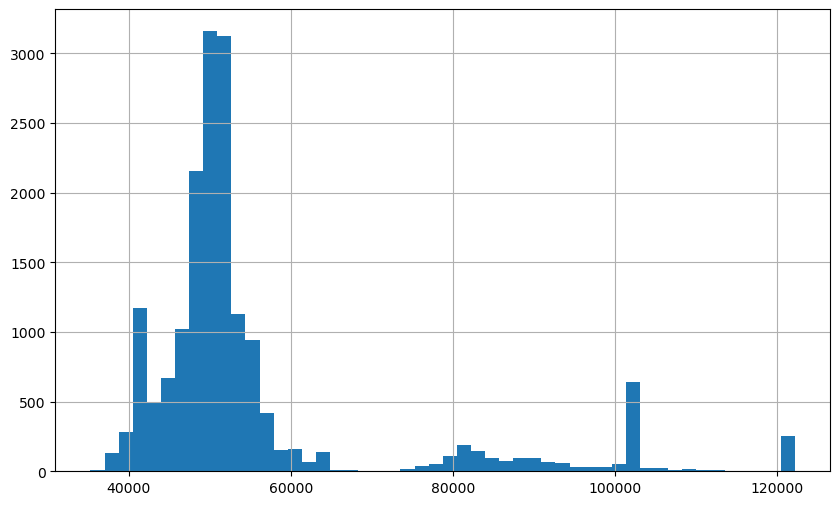

In [11]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(10,6))
tesla_price = sales[sales['Make'] == 'TESLA']
tesla_price = tesla_price[(tesla_price['Sale Price'] > 10000) & (tesla_price['Sale Price'] < 200000)]
tesla_price['Sale Price'].hist(bins=50)
plt.show()

Histogram of Tesla sale price. 
This histogram shows that car sale price are not uniformly distributed, nor is it linear. Instead, car sale prices are clustered around certain specific numbers. The primary reason for this is that there's different vehicles and different trims of the same model, selling at different prices. The distribution is because that vehicles are sold at a price different from their MSRP. The retailer may give consumer discounts or add additional packages to the vehicle, resulting in the difference in car prices.

In [12]:
sales.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model', 'Primary Use', 'Electric Range',
       'Odometer Reading', 'Odometer Reading Description',
       'New or Used Vehicle', 'Sale Price', 'Sale Date', 'Base MSRP',
       'Transaction Type', 'Transaction Date', 'Year', 'County', 'City',
       'State', 'Postal Code',
       '2019 HB 2042: Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid', '2020 GEOID',
       'Legislative District', 'Electric Utility', 'Trim'],
      dtype='object')

In [13]:
sales_city_count = sales.groupby("City").size().reset_index(name="Count").sort_values("Count", ascending=False)
sales_city_count['Cumulative Percentage'] = sales_city_count['Count'].cumsum() / sales_city_count['Count'].sum() * 100
sales_city_count

,City,Count,Cumulative Percentage
314,SEATTLE,5594,14.827970
24,BELLEVUE,2212,20.691300
290,REDMOND,1444,24.518899
32,BOTHELL,1359,28.121190
372,VANCOUVER,1313,31.601548
...,...,...,...
354,THORP,1,99.989397
7,ALMIRA,1,99.992048
394,WRCH,1,99.994699
8,AMANDA PARK,1,99.997349


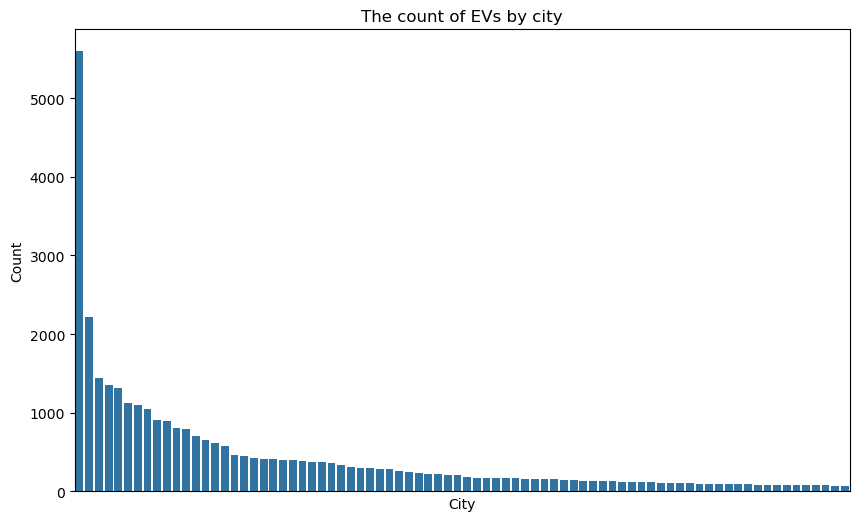

In [27]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Count", data=sales_city_count.head(80))  # show only first 80 otherwise the graph not quite readable
plt.xticks([])
plt.title("The count of EVs by city")
plt.show()

Graph of possession of EV by city.
From the graph we can tell that EV distribution follows a power law distribution in WA. Most EVs are possessed in one or two cities, while others are distributed across the state.

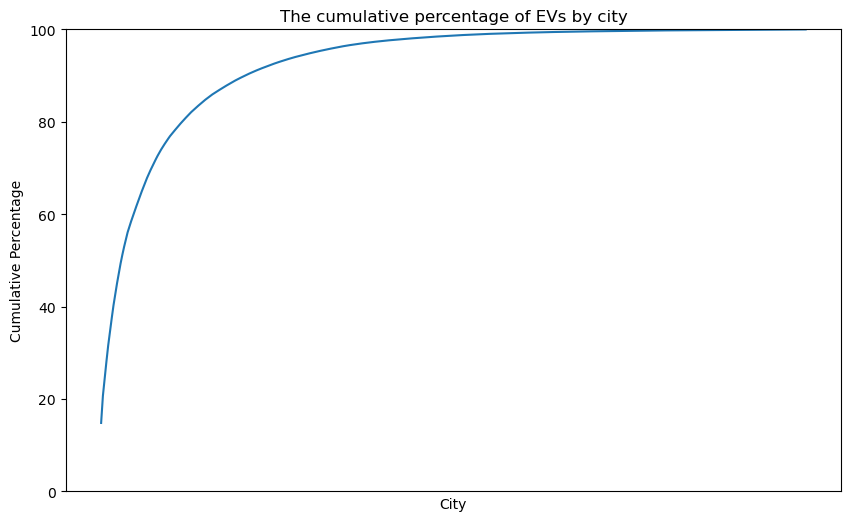

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x="City", y="Cumulative Percentage", data=sales_city_count)
plt.xticks([])
plt.ylim(0, 100)
plt.title("The cumulative percentage of EVs by city")
plt.show()

Another graph of EV possession by city.
Of all the cities in WA, most are concentrated in the top several, while others are distributed across the state. The curve is typical and meets our expectation of distribution as a long tail. 

In [14]:
import altair as alt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # for suppressing warnings produces by altair internal code

interval = alt.selection_interval(encodings=['x'], value=[{"City": x} for x in sales_city_count["City"].tolist()[:50]])

bar_base = alt.Chart(sales_city_count).mark_bar().encode(
    x=alt.X("City:O", sort="-y", axis=alt.Axis(labels=False, ticks=False)),
    y=alt.Y("Count:Q"),
    tooltip=["City", "Count"]
)

bar_chart = bar_base.encode(
    x=alt.X("City:O", sort="-y", axis=alt.Axis(labels=False, ticks=False), scale=alt.Scale(domain=interval)),
).transform_filter(
    interval
).properties(
    width=800,
    height=300
)

bar_view = bar_base.add_params(
    interval
).properties(
    width=800,
    height=50
)

line_base = alt.Chart(sales_city_count).mark_line(
    color="red"
).encode(
    x=alt.X("City:O", sort="-y"),
    y=alt.Y("Cumulative Percentage:Q", title="Cumulative Percentage (%)", scale=alt.Scale(domain=(0, 100))),
    tooltip=['Cumulative Percentage']
)

line_chart = line_base.encode(
    x=alt.X("City:O", sort="-y", scale=alt.Scale(domain=interval))
).transform_filter(
    interval
).properties(
    width=800,
    height=300
)

line_view = line_base.add_params(
    interval
).properties(
    width=800,
    height=50
)

((bar_chart + line_chart).resolve_scale(y="independent") & (bar_view + line_view).resolve_scale(y="independent")).properties(
    title="The number of EVs by city and their cumulative percentage"
)

alt.VConcatChart(...)

(The plot is interactive, click and drag on bottom view to zoom on the top chart)

The chart shows that the possession of EVs is not evenly distributed in the state and concentrates on a few major cities. The first 15% of cities have taken up over 80% of total EV possessions. Particularly, Seattle is with exceptionally high possessions of 5594.